In [68]:
import numpy as np
import pandas as pd
import pickle

In [69]:
data = []
project = ['openstack', 'qt']
eval = ['loss', 'auc']
model = ['lgb', 'code_cnn', 'msg_tf']
for p in project:
    for e in eval:
        for m in model:
            with open('../score/'+p+'-'+m+'-random-train_'+e+'.pkl', 'rb') as f:
                if m == 'msg_tf':
                    model2 = 'msg'
                elif m == 'lgb':
                    model2 = 'metrics'
                else:
                    model2 = 'code'
                data.append([p,e,model2] + pickle.load(f))

In [70]:
project = ['openstack', 'qt']
eval = ['loss', 'auc']
model = ['msg_tf']
for p in project:
    for e in eval:
        for m in model:
            with open('../no_its_resource/score/'+p+'-'+m+'-random-train_'+e+'.pkl', 'rb') as f:
                data.append([p,e,'msg_no_its'] + pickle.load(f))

In [71]:
columns = ['project','eval', 'model', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']
df = pd.DataFrame(data=data, columns=columns)

In [72]:
df = df.set_index(['project', 'eval', 'model'])

In [73]:
df = df.sort_index()
df

fold1     fold2     fold3     fold4     fold5
project   eval model                                                       
openstack auc  code        0.796467  0.807784  0.784157  0.821808  0.804218
               metrics     0.770682  0.784640  0.772729  0.786800  0.792227
               msg         0.683104  0.716241  0.724099  0.724501  0.737735
               msg_no_its  0.695109  0.711191  0.712126  0.722972  0.743396
          loss code        0.470166  0.414103  0.587887  0.573016  0.530680
               metrics     0.556436  0.558637  0.558254  0.552364  0.572734
               msg         0.498637  0.409187  0.453681  0.408717  0.456292
               msg_no_its  0.507226  0.441310  0.486800  0.481339  0.413004
qt        auc  code        0.804727  0.816839  0.789014  0.787770  0.798981
               metrics     0.779907  0.788826  0.764147  0.777805  0.768163
               msg         0.710222  0.726984  0.698660  0.708998  0.726833
               msg_no_its  0.708942  0.734252  0.709042  0.714316  0.717561
          loss code        0.608245  0.520208  0.550252  0.533122  0.571156
               metrics     0.515514  0.514216  0.522562  0.474499  0.476887
               msg         0.347726  0.367691  0.431243  0.594071  0.316294
               msg_no_its  0.294699  0.286239  0.348201  0.444388  0.288377

In [74]:
df['mean'] = np.mean(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['variance'] = np.var(df[[ 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['std_dev'] = np.std(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df

fold1     fold2     fold3     fold4     fold5  \
project   eval model                                                          
openstack auc  code        0.796467  0.807784  0.784157  0.821808  0.804218   
               metrics     0.770682  0.784640  0.772729  0.786800  0.792227   
               msg         0.683104  0.716241  0.724099  0.724501  0.737735   
               msg_no_its  0.695109  0.711191  0.712126  0.722972  0.743396   
          loss code        0.470166  0.414103  0.587887  0.573016  0.530680   
               metrics     0.556436  0.558637  0.558254  0.552364  0.572734   
               msg         0.498637  0.409187  0.453681  0.408717  0.456292   
               msg_no_its  0.507226  0.441310  0.486800  0.481339  0.413004   
qt        auc  code        0.804727  0.816839  0.789014  0.787770  0.798981   
               metrics     0.779907  0.788826  0.764147  0.777805  0.768163   
               msg         0.710222  0.726984  0.698660  0.708998  0.726833   
               msg_no_its  0.708942  0.734252  0.709042  0.714316  0.717561   
          loss code        0.608245  0.520208  0.550252  0.533122  0.571156   
               metrics     0.515514  0.514216  0.522562  0.474499  0.476887   
               msg         0.347726  0.367691  0.431243  0.594071  0.316294   
               msg_no_its  0.294699  0.286239  0.348201  0.444388  0.288377   

                               mean  variance   std_dev  
project   eval model                                     
openstack auc  code        0.802887  0.000155  0.012456  
               metrics     0.781416  0.000069  0.008330  
               msg         0.717136  0.000337  0.018363  
               msg_no_its  0.716959  0.000254  0.015932  
          loss code        0.515170  0.004223  0.064984  
               metrics     0.559685  0.000048  0.006893  
               msg         0.445303  0.001136  0.033700  
               msg_no_its  0.465936  0.001157  0.034017  
qt        auc  code        0.799466  0.000115  0.010731  
               metrics     0.775770  0.000077  0.008771  
               msg         0.714339  0.000121  0.011021  
               msg_no_its  0.716823  0.000087  0.009309  
          loss code        0.556596  0.000959  0.030968  
               metrics     0.500736  0.000427  0.020657  
               msg         0.411405  0.009754  0.098765  
               msg_no_its  0.332381  0.003656  0.060467

In [75]:
# 各レコードごとにデータを平均0、標準偏差1に正規化
# df = (((df.T - df.T.mean()) / df.T.std(ddof=0)).T)


In [76]:
df

fold1     fold2     fold3     fold4     fold5  \
project   eval model                                                          
openstack auc  code        0.796467  0.807784  0.784157  0.821808  0.804218   
               metrics     0.770682  0.784640  0.772729  0.786800  0.792227   
               msg         0.683104  0.716241  0.724099  0.724501  0.737735   
               msg_no_its  0.695109  0.711191  0.712126  0.722972  0.743396   
          loss code        0.470166  0.414103  0.587887  0.573016  0.530680   
               metrics     0.556436  0.558637  0.558254  0.552364  0.572734   
               msg         0.498637  0.409187  0.453681  0.408717  0.456292   
               msg_no_its  0.507226  0.441310  0.486800  0.481339  0.413004   
qt        auc  code        0.804727  0.816839  0.789014  0.787770  0.798981   
               metrics     0.779907  0.788826  0.764147  0.777805  0.768163   
               msg         0.710222  0.726984  0.698660  0.708998  0.726833   
               msg_no_its  0.708942  0.734252  0.709042  0.714316  0.717561   
          loss code        0.608245  0.520208  0.550252  0.533122  0.571156   
               metrics     0.515514  0.514216  0.522562  0.474499  0.476887   
               msg         0.347726  0.367691  0.431243  0.594071  0.316294   
               msg_no_its  0.294699  0.286239  0.348201  0.444388  0.288377   

                               mean  variance   std_dev  
project   eval model                                     
openstack auc  code        0.802887  0.000155  0.012456  
               metrics     0.781416  0.000069  0.008330  
               msg         0.717136  0.000337  0.018363  
               msg_no_its  0.716959  0.000254  0.015932  
          loss code        0.515170  0.004223  0.064984  
               metrics     0.559685  0.000048  0.006893  
               msg         0.445303  0.001136  0.033700  
               msg_no_its  0.465936  0.001157  0.034017  
qt        auc  code        0.799466  0.000115  0.010731  
               metrics     0.775770  0.000077  0.008771  
               msg         0.714339  0.000121  0.011021  
               msg_no_its  0.716823  0.000087  0.009309  
          loss code        0.556596  0.000959  0.030968  
               metrics     0.500736  0.000427  0.020657  
               msg         0.411405  0.009754  0.098765  
               msg_no_its  0.332381  0.003656  0.060467

[fold1    0.796467
fold2    0.807784
fold3    0.784157
fold4    0.821808
fold5    0.804218
Name: (openstack, auc, code), dtype: float64, fold1    0.770682
fold2    0.784640
fold3    0.772729
fold4    0.786800
fold5    0.792227
Name: (openstack, auc, metrics), dtype: float64, fold1    0.683104
fold2    0.716241
fold3    0.724099
fold4    0.724501
fold5    0.737735
Name: (openstack, auc, msg), dtype: float64, fold1    0.695109
fold2    0.711191
fold3    0.712126
fold4    0.722972
fold5    0.743396
Name: (openstack, auc, msg_no_its), dtype: float64, fold1    0.804727
fold2    0.816839
fold3    0.789014
fold4    0.787770
fold5    0.798981
Name: (qt, auc, code), dtype: float64, fold1    0.779907
fold2    0.788826
fold3    0.764147
fold4    0.777805
fold5    0.768163
Name: (qt, auc, metrics), dtype: float64, fold1    0.710222
fold2    0.726984
fold3    0.698660
fold4    0.708998
fold5    0.726833
Name: (qt, auc, msg), dtype: float64, fold1    0.708942
fold2    0.734252
fold3    0.709042
fold

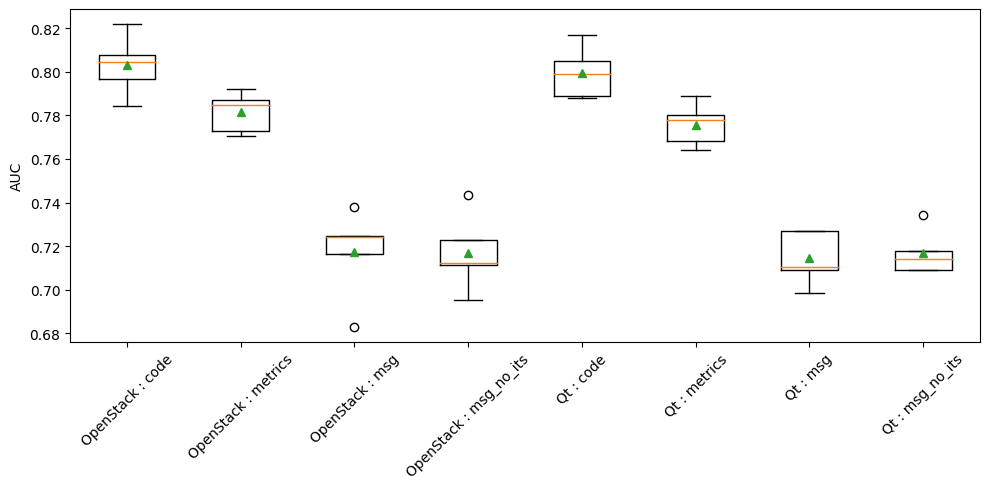

In [77]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 5), tight_layout=True)
data_list = []
label_list = []
for index, row in df.iterrows():
    if index[1] == 'auc':
        data_list.append(row[['fold1', 'fold2', 'fold3','fold4','fold5']])
        if index[0] == 'openstack':
            project = 'OpenStack'
        else:
            project = 'Qt'
        label = project+' : '+index[2]
        label_list.append(label)
        
print(data_list)
ax.boxplot(data_list, showmeans=True)
labels = ax.set_xticklabels(label_list)
# plt.title('AUC')
plt.setp(labels, rotation=45, fontsize=10)
plt.ylabel('AUC')
plt.show()

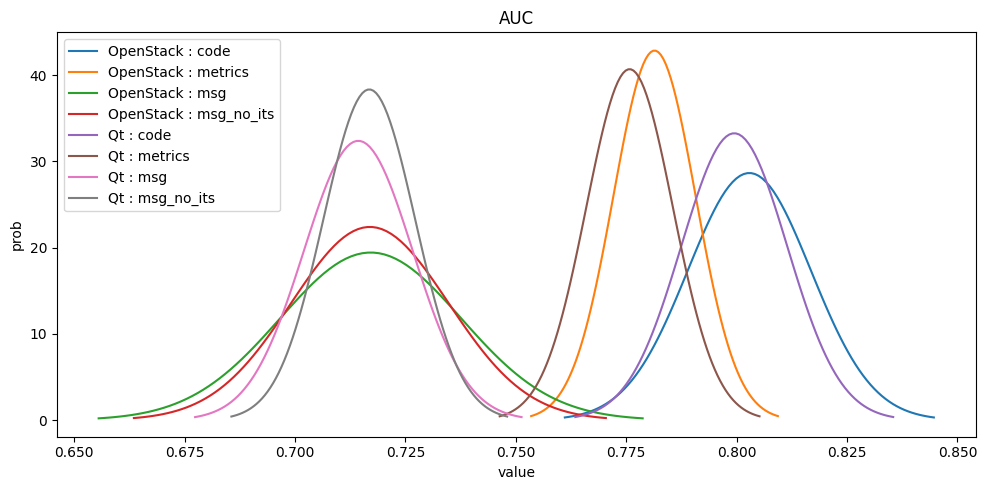

In [78]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10, 5), tight_layout=True)

for index, row in df.iterrows():
    mean = row[['fold1', 'fold2', 'fold3','fold4','fold5']].mean()
    std_dev = row[['fold1', 'fold2', 'fold3','fold4','fold5']].std()
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    if index[0] == 'openstack':
        project = 'OpenStack'
    else:
        project = 'Qt'
    label = project+' : '+index[2]
    if index[1] == 'auc':
        plt.plot(x, y, label=label)
    
# プロットの表示
plt.title('AUC')
plt.xlabel('value')
plt.ylabel('prob')
plt.legend()
plt.show()

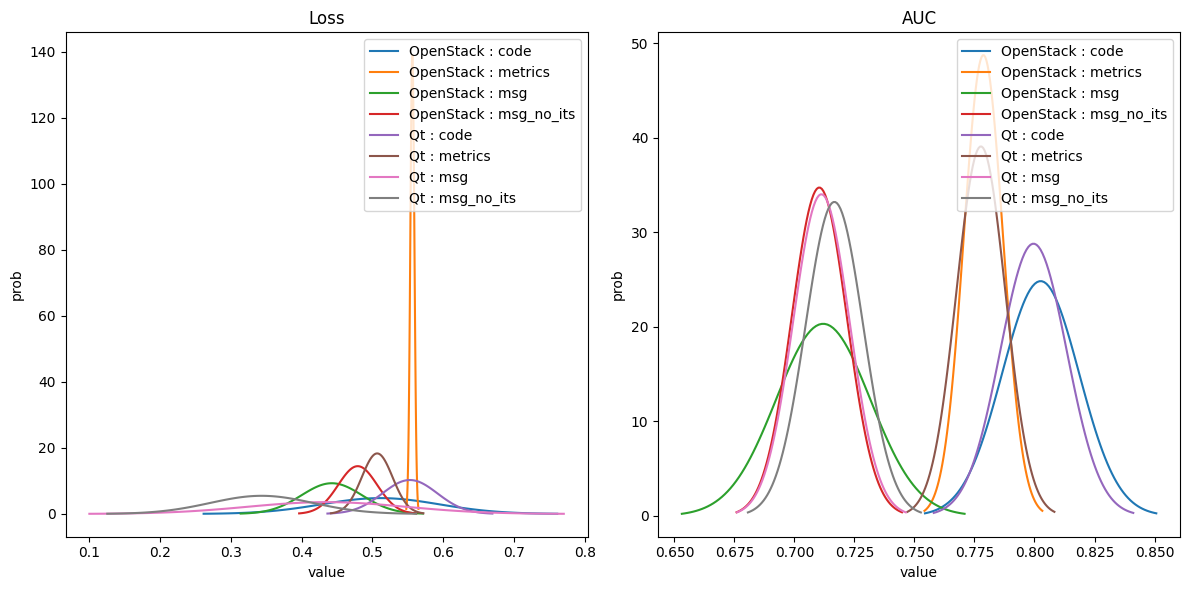

In [79]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 2,  figsize=(12, 6), tight_layout=True)

for index, row in df.iterrows():
    mean = row[['fold1', 'fold2', 'fold3','fold4']].mean()
    std_dev = row[['fold1', 'fold2', 'fold3','fold4']].std()
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    if index[0] == 'openstack':
        project = 'OpenStack'
    else:
        project = 'Qt'
    label = project+' : '+index[2]
    if index[1] == 'loss':
        axes[0].plot(x, y, label=label)
    else:
        axes[1].plot(x, y, label=label)
    
# プロットの表示
for i in range(2):
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('prob')
    axes[i].legend(loc='upper right')
axes[0].set_title("Loss") 
axes[1].set_title("AUC")
plt.show()


In [80]:
df['mean'] = np.mean(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['variance'] = np.var(df[[ 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['std_dev'] = np.std(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)

In [81]:
df

fold1     fold2     fold3     fold4     fold5  \
project   eval model                                                          
openstack auc  code        0.796467  0.807784  0.784157  0.821808  0.804218   
               metrics     0.770682  0.784640  0.772729  0.786800  0.792227   
               msg         0.683104  0.716241  0.724099  0.724501  0.737735   
               msg_no_its  0.695109  0.711191  0.712126  0.722972  0.743396   
          loss code        0.470166  0.414103  0.587887  0.573016  0.530680   
               metrics     0.556436  0.558637  0.558254  0.552364  0.572734   
               msg         0.498637  0.409187  0.453681  0.408717  0.456292   
               msg_no_its  0.507226  0.441310  0.486800  0.481339  0.413004   
qt        auc  code        0.804727  0.816839  0.789014  0.787770  0.798981   
               metrics     0.779907  0.788826  0.764147  0.777805  0.768163   
               msg         0.710222  0.726984  0.698660  0.708998  0.726833   
               msg_no_its  0.708942  0.734252  0.709042  0.714316  0.717561   
          loss code        0.608245  0.520208  0.550252  0.533122  0.571156   
               metrics     0.515514  0.514216  0.522562  0.474499  0.476887   
               msg         0.347726  0.367691  0.431243  0.594071  0.316294   
               msg_no_its  0.294699  0.286239  0.348201  0.444388  0.288377   

                               mean  variance   std_dev  
project   eval model                                     
openstack auc  code        0.802887  0.000155  0.012456  
               metrics     0.781416  0.000069  0.008330  
               msg         0.717136  0.000337  0.018363  
               msg_no_its  0.716959  0.000254  0.015932  
          loss code        0.515170  0.004223  0.064984  
               metrics     0.559685  0.000048  0.006893  
               msg         0.445303  0.001136  0.033700  
               msg_no_its  0.465936  0.001157  0.034017  
qt        auc  code        0.799466  0.000115  0.010731  
               metrics     0.775770  0.000077  0.008771  
               msg         0.714339  0.000121  0.011021  
               msg_no_its  0.716823  0.000087  0.009309  
          loss code        0.556596  0.000959  0.030968  
               metrics     0.500736  0.000427  0.020657  
               msg         0.411405  0.009754  0.098765  
               msg_no_its  0.332381  0.003656  0.060467

In [82]:
data = []
project = ['openstack', 'qt']
eval = ['loss', 'auc']
model = ['msg_tf']
for p in project:
    for e in eval:
        for m in model:
            with open('../score/'+p+'-'+m+'-random-train_'+e+'.pkl', 'rb') as f:
                data.append([p,e,m,'in_its'] + pickle.load(f))

In [83]:
project = ['openstack', 'qt']
eval = ['loss', 'auc']
model = ['msg_tf']
for p in project:
    for e in eval:
        for m in model:
            with open('../no_its_resource/score/'+p+'-'+m+'-random-train_'+e+'.pkl', 'rb') as f:
                data.append([p,e,m,'no_its'] + pickle.load(f))

In [84]:
columns = ['project','eval', 'model','is_its','fold1', 'fold2', 'fold3', 'fold4', 'fold5']
df = pd.DataFrame(data=data, columns=columns)

In [85]:
df

,project,eval,model,is_its,fold1,fold2,fold3,fold4,fold5
0,openstack,loss,msg_tf,in_its,0.498637,0.409187,0.453681,0.408717,0.456292
1,openstack,auc,msg_tf,in_its,0.683104,0.716241,0.724099,0.724501,0.737735
2,qt,loss,msg_tf,in_its,0.347726,0.367691,0.431243,0.594071,0.316294
3,qt,auc,msg_tf,in_its,0.710222,0.726984,0.698660,0.708998,0.726833
4,openstack,loss,msg_tf,no_its,0.507226,0.441310,0.486800,0.481339,0.413004
5,openstack,auc,msg_tf,no_its,0.695109,0.711191,0.712126,0.722972,0.743396
6,qt,loss,msg_tf,no_its,0.294699,0.286239,0.348201,0.444388,0.288377
7,qt,auc,msg_tf,no_its,0.708942,0.734252,0.709042,0.714316,0.717561


In [86]:
df = df.set_index(['project', 'eval', 'model', 'is_its'])

In [87]:
df = df.sort_index()
df

fold1     fold2     fold3     fold4     fold5
project   eval model  is_its                                                  
openstack auc  msg_tf in_its  0.683104  0.716241  0.724099  0.724501  0.737735
                      no_its  0.695109  0.711191  0.712126  0.722972  0.743396
          loss msg_tf in_its  0.498637  0.409187  0.453681  0.408717  0.456292
                      no_its  0.507226  0.441310  0.486800  0.481339  0.413004
qt        auc  msg_tf in_its  0.710222  0.726984  0.698660  0.708998  0.726833
                      no_its  0.708942  0.734252  0.709042  0.714316  0.717561
          loss msg_tf in_its  0.347726  0.367691  0.431243  0.594071  0.316294
                      no_its  0.294699  0.286239  0.348201  0.444388  0.288377

[fold1    0.683104
fold2    0.716241
fold3    0.724099
fold4    0.724501
fold5    0.737735
Name: (openstack, auc, msg_tf, in_its), dtype: float64, fold1    0.695109
fold2    0.711191
fold3    0.712126
fold4    0.722972
fold5    0.743396
Name: (openstack, auc, msg_tf, no_its), dtype: float64, fold1    0.710222
fold2    0.726984
fold3    0.698660
fold4    0.708998
fold5    0.726833
Name: (qt, auc, msg_tf, in_its), dtype: float64, fold1    0.708942
fold2    0.734252
fold3    0.709042
fold4    0.714316
fold5    0.717561
Name: (qt, auc, msg_tf, no_its), dtype: float64]


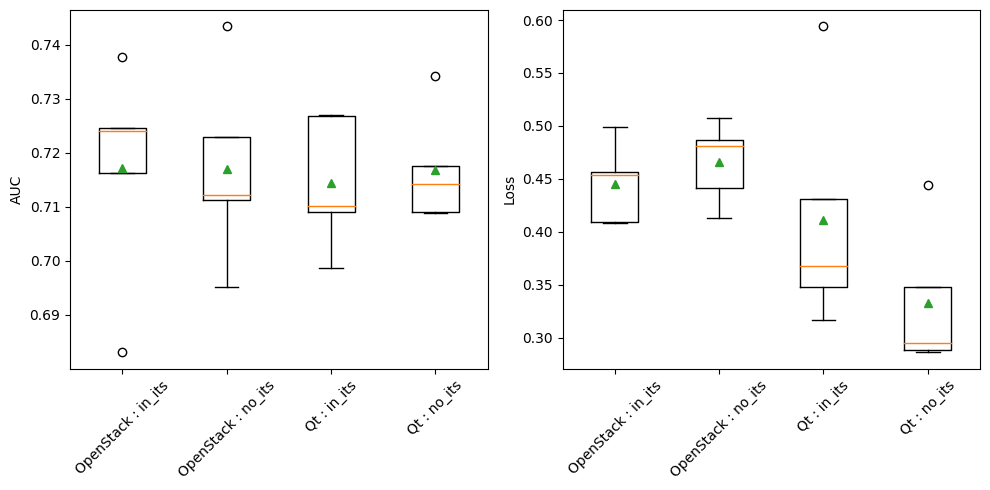

In [91]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,2, figsize=(10, 5), tight_layout=True)
data_list = []
label_list = []
data_list2 = []
label_list2 = []
for index, row in df.iterrows():
    if index[1] == 'auc':
        data_list.append(row[['fold1', 'fold2', 'fold3','fold4','fold5']])
        if index[0] == 'openstack':
            project = 'OpenStack'
        else:
            project = 'Qt'
        label = project+' : '+index[3]
        label_list.append(label)
    else:
        data_list2.append(row[['fold1', 'fold2', 'fold3','fold4','fold5']])
        if index[0] == 'openstack':
            project = 'OpenStack'
        else:
            project = 'Qt'
        label = project+' : '+index[3]
        label_list2.append(label)
        
print(data_list)
ax[0].boxplot(data_list, showmeans=True)
labels = ax[0].set_xticklabels(label_list)
# ax[0].set_title('AUC')
ax[0].set_ylabel('AUC')
ax[1].boxplot(data_list2, showmeans=True)
labels2 = ax[1].set_xticklabels(label_list2)
# ax[1].set_title('Loss')
ax[1].set_ylabel('Loss')

plt.setp([labels, labels2], rotation=45, fontsize=10)
plt.show()

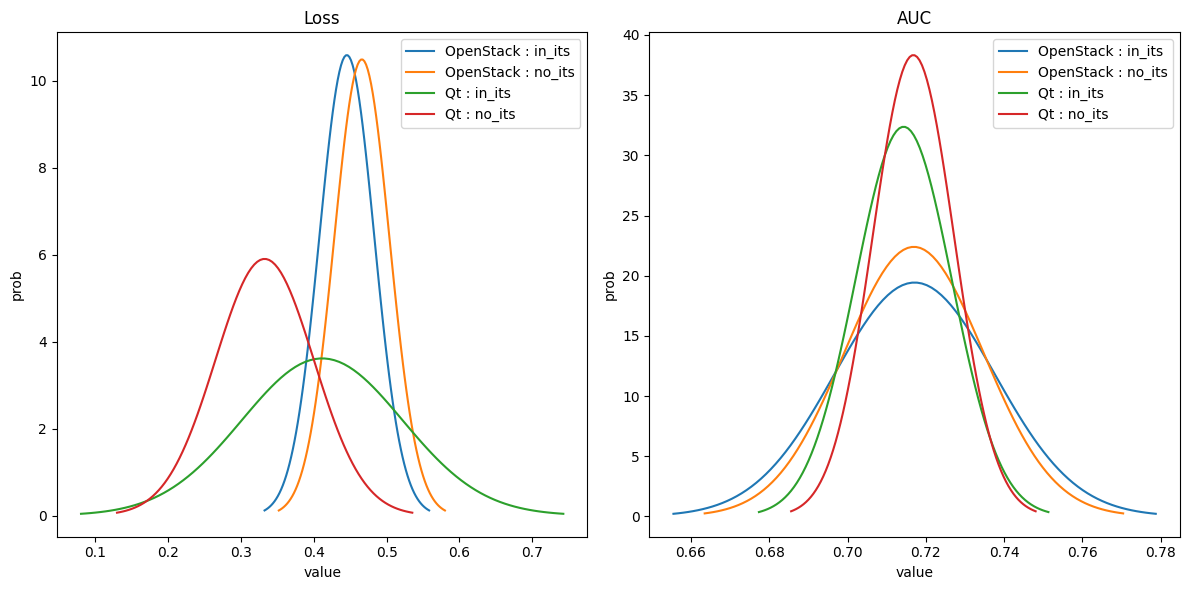

In [89]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 2,  figsize=(12, 6), tight_layout=True)

for index, row in df.iterrows():
    mean = row[['fold1', 'fold2', 'fold3','fold4','fold5']].mean()
    std_dev = row[['fold1', 'fold2', 'fold3','fold4','fold5']].std()
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    if index[0] == 'openstack':
        project = 'OpenStack'
    else:
        project = 'Qt'
    # label = project+' : '+index[2]
    label = project+' : '+index[3]
    if index[1] == 'loss':
        axes[0].plot(x, y, label=label)
    else:
        axes[1].plot(x, y, label=label)
    
# プロットの表示
for i in range(2):
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('prob')
    axes[i].legend(loc='upper right')
axes[0].set_title("Loss") 
axes[1].set_title("AUC")
plt.show()